In [1]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


Загрузим исходное изображение и покажем его:

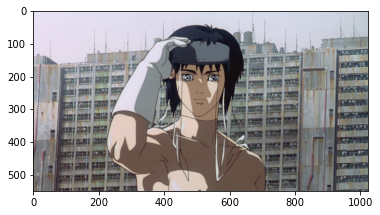

In [2]:
img = image.load_img("input_image.jpg")
plt.imshow(img)

Преобразуем исходное изображение в матрицу с разменостью (x, y, 3):

In [3]:
image_matrix = image.img_to_array(img)

Собственно, сама функция.Рандомно проходим по каждому пикселю и, если хотя бы один из трёх
каналов не равен нулю, прибавляем к нему число, не выходящее из диапазона (-noise_level, noise_level).
После окончания прохода проверяем, что значения каналов RGB не будут выходить из диапазона (0, 255) и
"обрезаем" их до приемлемого уровня.

In [4]:
def noise(source_matrix, noise_level):
    result = np.copy(source_matrix)
    for x in range(source_matrix.shape[0]):
        for y in range(source_matrix.shape[1]):
            if result[x][y].any() != 0:
                noise = random.randint(-noise_level, noise_level)
                result[x][y] += noise
    result = np.clip(result, 0, 255) 
    return result

Применим вышеописанную функцию:

In [5]:
output_img_matrix = noise(image_matrix, 100)

Преобразуем полученную матрицу в изображение и покажем её:

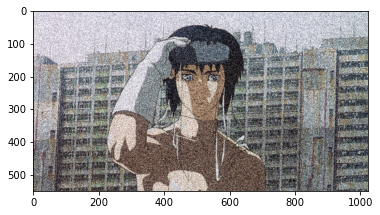

In [6]:
output_image = image.array_to_img(output_img_matrix)
plt.imshow(output_image)

Сохраним полученное изображение:

In [7]:
output_image.save("noise_augmentation_output.jpg")